# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.123384e+01     7.209522e+00
 * time: 0.00174713134765625
     1     2.334337e+01     4.433550e+00
 * time: 0.007395029067993164
     2     1.706751e+01     5.218353e+00
 * time: 0.013616085052490234
     3     1.267391e+01     3.217819e+00
 * time: 0.018815994262695312
     4     1.027232e+01     1.974235e+00
 * time: 0.023105144500732422
     5     9.588984e+00     2.043540e+00
 * time: 0.026401042938232422
     6     9.162822e+00     1.016987e+00
 * time: 0.029624223709106445
     7     8.886730e+00     9.829798e-01
 * time: 0.03296017646789551
     8     8.691892e+00     8.911562e-01
 * time: 0.03615617752075195
     9     8.554429e+00     7.749345e-01
 * time: 0.03972506523132324
    10     8.443694e+00     5.860443e-01
 * time: 0.04380321502685547
    11     8.427441e+00     1.010395e+00
 * time: 0.047518014907836914
    12     8.319714e+00     6.918297e-01
 * time: 0.05144214630126953
    13     8.247678e+00     9.112086e-01
 

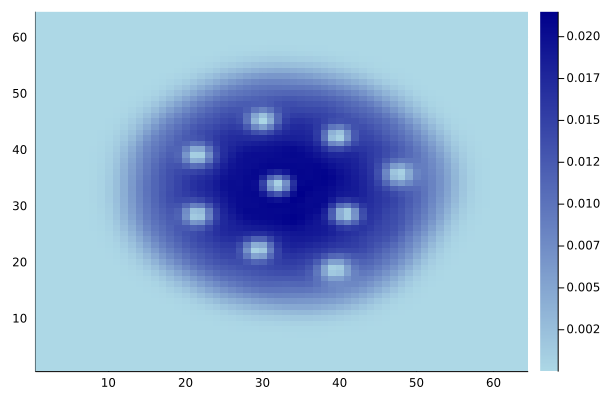

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)